# importing libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the Titanic dataset 

In [2]:
df = pd.read_csv('titanic.csv') 

# Display basic information about the dataset 

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


# Handle missing values

In [4]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Convert categorical variables to numerical using one-hot encoding 

In [5]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

#  Perform EDA: Relationship between Pclass, Sex, and survival 

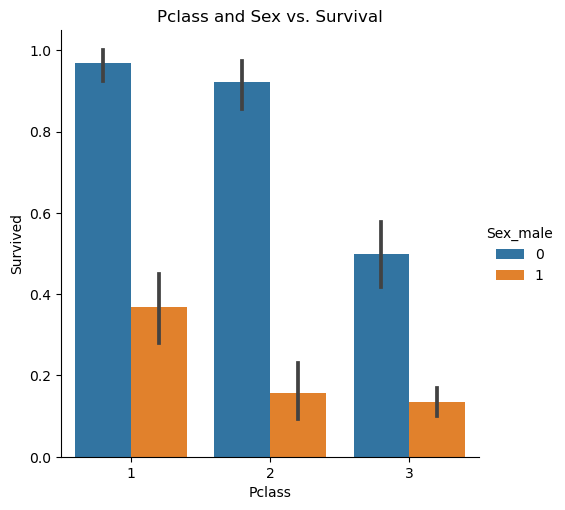

In [6]:
sns.catplot(x='Pclass', y='Survived', hue='Sex_male', kind='bar', data=df)
plt.title('Pclass and Sex vs. Survival')
plt.show()

# Perform EDA: Pairplot for numerical variables 

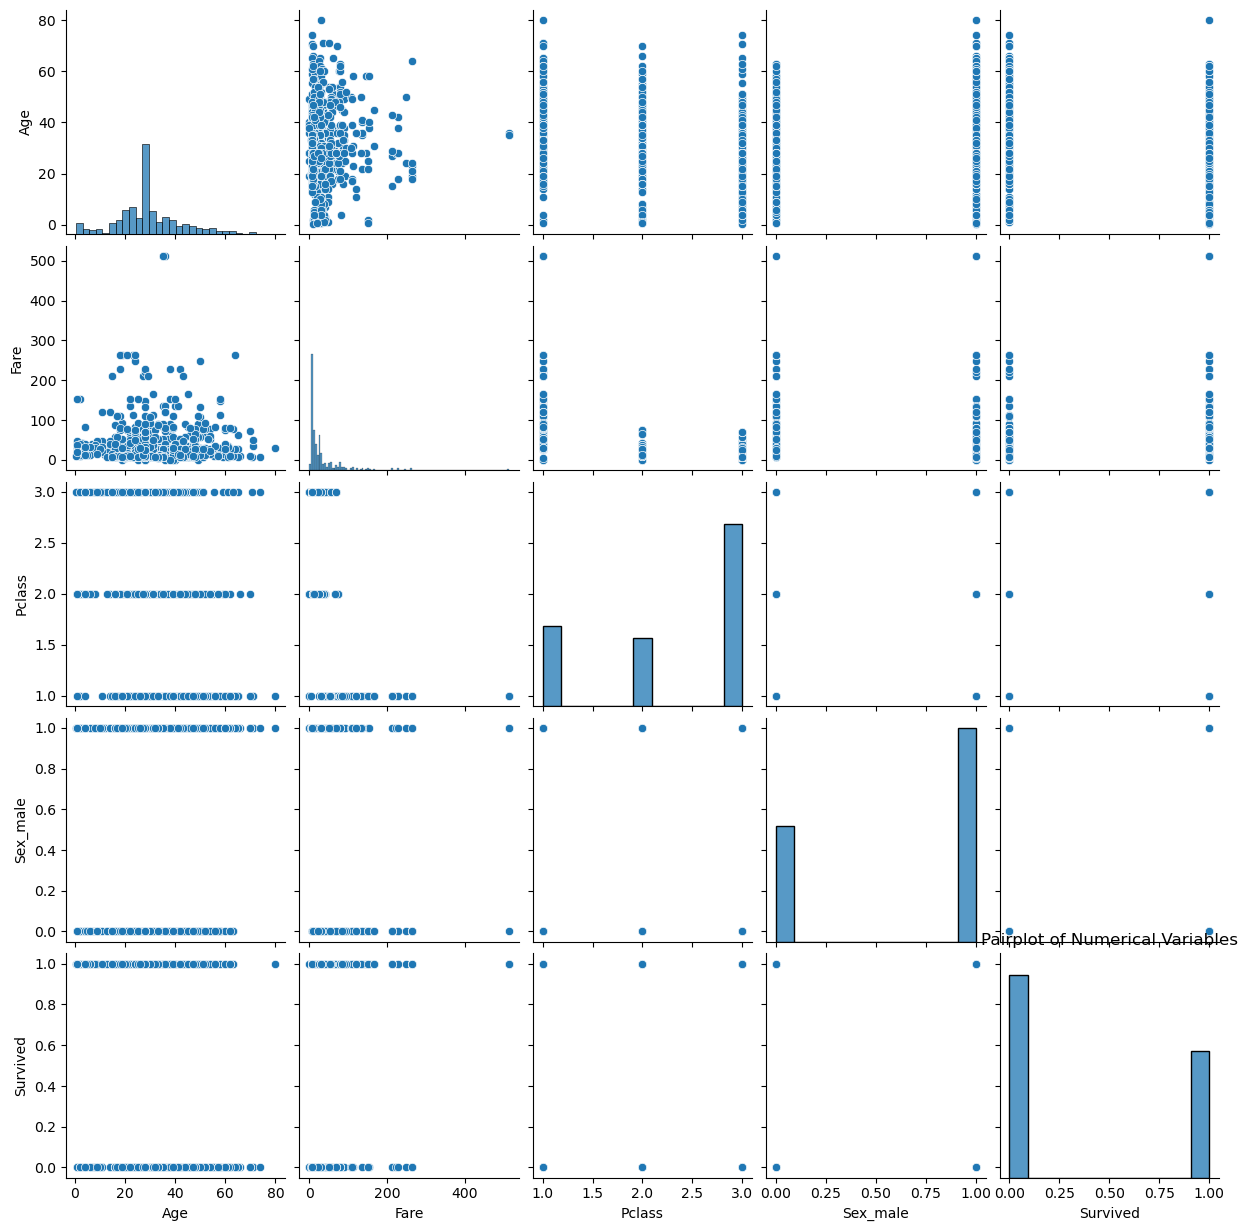

In [7]:
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Sex_male', 'Survived']])
plt.title('Pairplot of Numerical Variables')
plt.show()

# Correlation matrix heatmap 

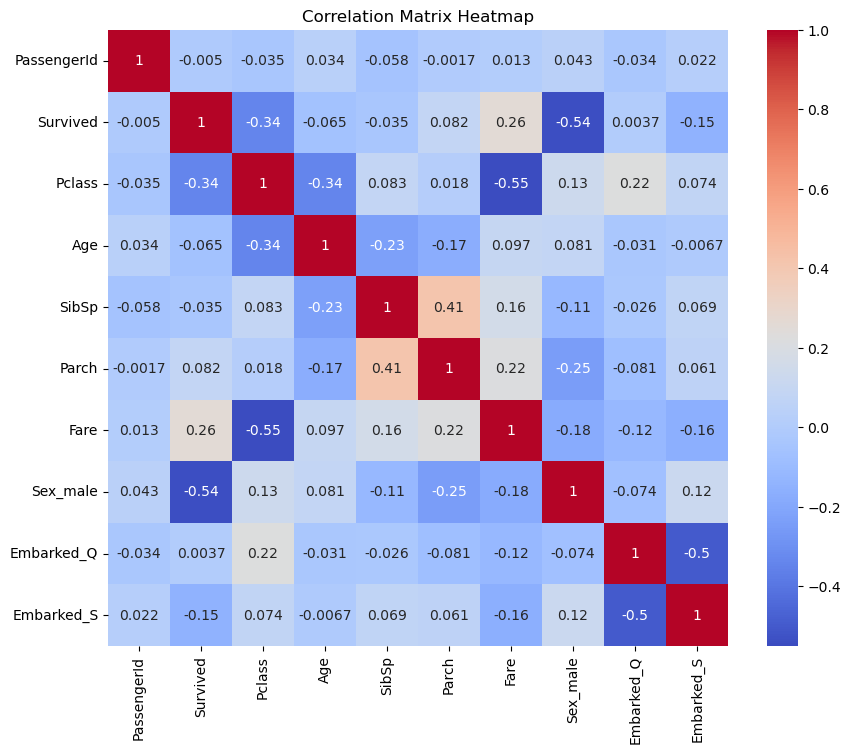

In [8]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Age distribution by Pclass and Sex 

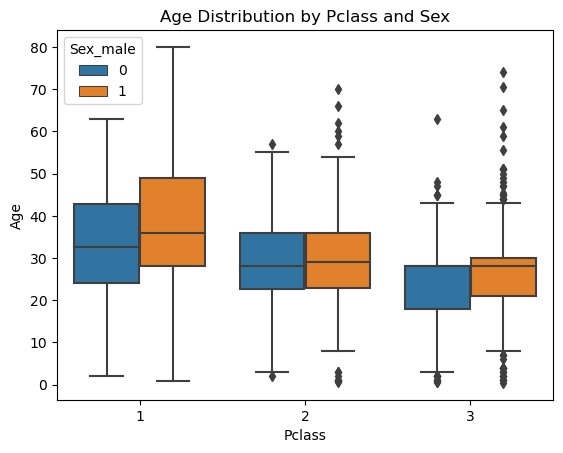

In [9]:
sns.boxplot(x='Pclass', y='Age', hue='Sex_male', data=df)
plt.title('Age Distribution by Pclass and Sex')
plt.show()